In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [15]:
# load and analog psgail
ps = np.load('1agent_psgail2000.npz')['trajs']
print(ps.shape)
s = 0
for i in range(2000):
    s += ps[i]['rmse_pos']
s/=2000
print(s)

# for logit and lateral
# logit, lat = 0, 0
# for i in range(2000):
#     logit += np.abs(ps[i]['y'] - ps[i]['orig_y'])
#     lat += np.abs(ps[i]['x'] - ps[i]['orig_x'])

# logit /= 2000
# lat /= 2000
# print(logit[:25], lat[:25])
# first version without error band
# s1 = 0
# for i in range(2000):
#     s1 += ps[i]['rmse_pos']
# s1 /= 2000
# s1 = s1[:25]
# print(s1)

(2000,)
[[1.25305490e-02]
 [3.75171834e-02]
 [7.48750342e-02]
 [1.25884099e-01]
 [1.90642256e-01]
 [2.68586356e-01]
 [3.58805058e-01]
 [4.60575818e-01]
 [5.73233891e-01]
 [6.96032923e-01]
 [8.28170050e-01]
 [9.68535958e-01]
 [1.11621203e+00]
 [1.27064920e+00]
 [1.43143189e+00]
 [1.59797554e+00]
 [1.76938525e+00]
 [1.94506874e+00]
 [2.12429308e+00]
 [2.30666135e+00]
 [2.49147295e+00]
 [2.67834674e+00]
 [2.86698178e+00]
 [3.05692119e+00]
 [3.24777558e+00]
 [3.43911949e+00]
 [3.63037599e+00]
 [3.82144735e+00]
 [4.01178329e+00]
 [4.20090861e+00]
 [4.38874051e+00]
 [4.57511770e+00]
 [4.76017885e+00]
 [4.94379909e+00]
 [5.12598495e+00]
 [5.30670088e+00]
 [5.48601785e+00]
 [5.66374281e+00]
 [5.83975719e+00]
 [6.01421180e+00]
 [6.18728048e+00]
 [6.35931936e+00]
 [6.52959158e+00]
 [6.69781274e+00]
 [6.86395209e+00]
 [7.02801055e+00]
 [7.19006948e+00]
 [7.35026844e+00]
 [7.50870381e+00]
 [7.66530657e+00]
 [7.82017995e+00]
 [7.97341802e+00]
 [8.12485312e+00]
 [8.27474092e+00]
 [8.42312261e+00]
 [

In [3]:
std1 = np.zeros([25, 1])
for i in range(25):
    stepi = np.array([ps[j]['rmse_pos'][i] for j in range(2000)])
    std1[i] = np.std(stepi)
print(std1)

[[0.0118959 ]
 [0.0266917 ]
 [0.0471402 ]
 [0.0741639 ]
 [0.10858081]
 [0.15060052]
 [0.19990538]
 [0.25587941]
 [0.3183558 ]
 [0.38665914]
 [0.46052432]
 [0.53965302]
 [0.62346951]
 [0.71128595]
 [0.80290456]
 [0.89783238]
 [0.99555978]
 [1.0959685 ]
 [1.19895903]
 [1.3036845 ]
 [1.41006919]
 [1.51791716]
 [1.62684906]
 [1.73675884]
 [1.8475644 ]]


In [3]:
for i in [24]:
    stepi = np.array([ps[j]['rmse_pos'][i] for j in range(2000)]).flatten()
    l = len(stepi)
    std1 = sorted(stepi, reverse=True)
print(std1[l//10], std1[l//20])

5.684207457492629 6.397619703124915


In [18]:
# aps = np.load('/home/khangtg/Documents/course/AI618_unsupervised_and_generative_models/code/ngsim_env/data/experiments/multiagent_curr/imitate/validation/trajdata_i101_22agents_AGen.npz', allow_pickle=True)['trajs']
aps = np.load('../outputs/5observations_22agents_cLatentODE.npz', allow_pickle=True)['trajs']
# aps = np.load('../outputs/trajdata_i101-22agents-0750am-0805am_1trajs_22agents_10observed_time_steps_ode_traj.npz', allow_pickle=True)['trajs']
print(aps.shape)
s2 = 0
leng = 330
for i in range(1):
    for j in range(330):
        try:
            s2 += aps[j]['rmse_pos']
        except:
            leng -= 1

s2 /= (leng)
print(s2.shape)
s2_mean = s2.mean(axis=1)
print(s2_mean)
print(np.mean(s2_mean[:25]))

logit, lat = 0, 0
for i in range(1):
    for j in range(330):
        logit += np.abs(aps[j]['y'] - aps[j]['orig_y'])
        lat += np.abs(aps[j]['x'] - aps[j]['orig_x'])

lat = np.sqrt(lat / 330)
logit = np.sqrt(logit / 330)
print(lat.shape, logit.shape)
print(np.mean(logit.mean(axis=1)[:25]), np.mean(lat.mean(axis=1)[:25]))

# s2 = 0
# for i in range(10):
#     for j in range(1000):
#         s2 += aps[i, j]['rmse_pos']
        
# s2 /= (10*1000)
# print(s2)

(330,)
(200, 22)
[1.11999491e-02 2.83199266e-02 5.18480470e-02 8.14061777e-02
 1.16664782e-01 1.57445912e-01 2.03390552e-01 2.53899647e-01
 3.08667082e-01 3.67551972e-01 4.30424294e-01 4.97116893e-01
 5.67491087e-01 6.41416286e-01 7.18744224e-01 7.99363985e-01
 8.83159972e-01 9.69940716e-01 1.05960708e+00 1.15203000e+00
 1.24714639e+00 1.34476082e+00 1.44472370e+00 1.54703345e+00
 1.65159322e+00 1.75838442e+00 1.86730093e+00 1.97826710e+00
 2.09122223e+00 2.20610140e+00 2.32283331e+00 2.44127049e+00
 2.56143178e+00 2.68338710e+00 2.80707407e+00 2.93245758e+00
 3.05955825e+00 3.18830216e+00 3.31872421e+00 3.45074278e+00
 3.58437942e+00 3.71961764e+00 3.85626852e+00 3.99439852e+00
 4.13394509e+00 4.27487846e+00 4.41710722e+00 4.56073800e+00
 4.70570550e+00 4.85185037e+00 4.99928781e+00 5.14794364e+00
 5.29774656e+00 5.44856645e+00 5.60043963e+00 5.75336013e+00
 5.90743653e+00 6.06261460e+00 6.21896691e+00 6.37650454e+00
 6.53533980e+00 6.69547651e+00 6.85687917e+00 7.01944104e+00
 7.1830

In [13]:
print(aps[0,2].keys())

dict_keys(['prev_action', 'x', 'rmse_vel', 'rmse_pos', 'is_offroad', 'is_colliding', 'markerdist_right', 'markerdist_left', 'y', 'rmse_t', 's', 'phi', 'mean', 'actions', 'observations', 'rewards', 'log_std'])


In [17]:
print(s.shape)

(200, 1)


In [5]:
std2 = np.zeros([25, 1])
for i in range(25):
    stepi = np.array([aps[k, j]['rmse_pos'][i] for k in range(10) for j in range(1000)])
    std2[i] = np.std(stepi)
print(std2)

[[0.00972752]
 [0.02195303]
 [0.0379547 ]
 [0.05799371]
 [0.08211679]
 [0.11030575]
 [0.14251343]
 [0.17866206]
 [0.21871258]
 [0.26252168]
 [0.31002158]
 [0.36111791]
 [0.41573019]
 [0.47374291]
 [0.53506692]
 [0.59952666]
 [0.66691614]
 [0.73725188]
 [0.81040692]
 [0.88633705]
 [0.96494911]
 [1.04616425]
 [1.12984419]
 [1.21572714]
 [1.30364454]]


Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


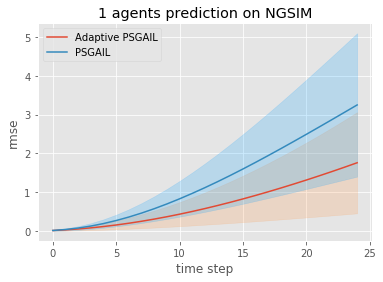

In [6]:
n_agents = 1

plt.plot(range(25), s2, label="Adaptive PSGAIL")
plt.fill_between(range(25), np.squeeze(s2-std2), np.squeeze(s2+std2), alpha=0.2, color='#FF9848')

plt.plot(range(25), s1, label="PSGAIL")
plt.fill_between(range(25), np.squeeze(s1-std1), np.squeeze(s1+std1), alpha=0.2, color='#089FFF')

plt.legend(loc=2)
plt.xlabel("time step")
plt.ylabel('rmse')
plt.title("{} agents prediction on NGSIM".format(n_agents))


from matplotlib2tikz import save as tikz_save

tikz_save("1agent.tex")

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


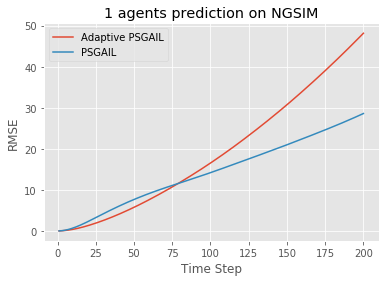

In [20]:
n_agents = 1
step = 200
plt.plot(range(1, step+1), s2, label="Adaptive PSGAIL")
# plt.fill_between(range(25), np.squeeze(s2-std2), np.squeeze(s2+std2), alpha=0.2, color='#FF9848')

plt.plot(range(1, step+1), s, label="PSGAIL")
# plt.fill_between(range(25), np.squeeze(s1-std1), np.squeeze(s1+std1), alpha=0.2, color='#089FFF')

plt.legend(loc=2)
plt.xlabel("Time Step")
plt.ylabel('RMSE')
plt.title("{} agents prediction on NGSIM".format(n_agents))


from matplotlib2tikz import save as tikz_save

tikz_save("1agent200step.tex")